In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse
import ipywidgets as widgets

In [2]:
num_angle = 180
num_offset = 1
num_spotx = 130
chord_length = True
RSP_shape = [190, 1226]

In [3]:
mlp = sparse.load_npz('../../Data/simple_pCT/MLP/MLP_angles{:d}_offset1_spotx130_exact_190_1226.npz'.format(num_angle))
wepl = np.load('../../Data/simple_pCT/WEPL/WEPL_angles{:d}_offset{:d}_spotx{:d}_exact_{:d}_{:d}.npy'.format(num_angle, num_offset, num_spotx, RSP_shape[0], RSP_shape[1]))

In [37]:
x = np.random.random(np.prod(RSP_shape))

A_norm = sparse.linalg.norm(mlp, axis=1)**2
valid = A_norm > 1e-9

Ax = mlp @ x

factor = (wepl.flatten()[valid] - Ax[valid]) / A_norm[valid]

S = np.array([mlp[:,i].count_nonzero() for i in range(mlp.shape[1])])
traversed = S > 0

lamb = 0.1
A = mlp[valid,:][:,traversed]
S_t = S[traversed]
for _ in range(100):
    x += lamb / S_t * (A.T @ factor)

print(x.shape)

(232940,)


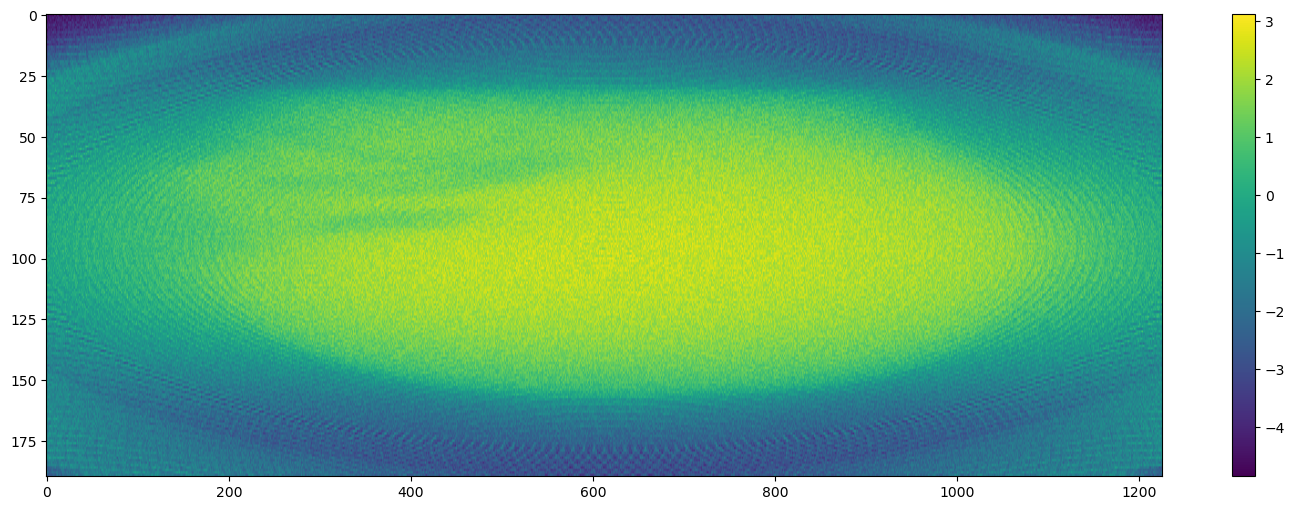

In [38]:
plt.figure(figsize=(18,6))
plt.imshow(x.reshape(RSP_shape), aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
A = pathprojector.toDense()
Ax = A @ self._x

A_norm = np.sum(A**2, axis=1)
valid = A_norm > 1e-9

rms = np.linalg.norm(Ax[valid] - wepl[valid])
print('residuum is:', rms)

factor = (wepl[valid] - Ax[valid]) / A_norm[valid]

S = np.count_nonzero(A[valid,...], axis=0)
traversed = S > 0

self._x[traversed] += self._lamb / S[traversed] * (A[valid,:][:,traversed].T @ factor)

# set all pixels to zero outside the valid volume
self._x[~self.obj] = 0